# Question Suggestion Feature

### Import Dependencies

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd

### Preproccessing

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [3]:
# Load the dataset
df = pd.read_csv('../dataset/data.csv')
df.head()

,Question,Category
0,Bagaimana cara memilih platform trading crypto...,Cryptocurrency
1,Apa itu cryptocurrency staking dan bagaimana c...,Cryptocurrency
2,Bagaimana cara mengenali proyek cryptocurrency...,Cryptocurrency
3,Apa saja teknik dasar dalam analisis teknikal ...,Cryptocurrency
4,Bagaimana cara melakukan trading cryptocurrenc...,Cryptocurrency


In [4]:
# Separate questions and labels
questions = df['Question'].tolist()
labels = df['Category'].tolist()

print(f'questions: {questions[:5]}')
print(f'labels: {labels[:5]}')

questions: ['Bagaimana cara memilih platform trading cryptocurrency?', 'Apa itu cryptocurrency staking dan bagaimana cara kerjanya?', 'Bagaimana cara mengenali proyek cryptocurrency yang menjanjikan?', 'Apa saja teknik dasar dalam analisis teknikal cryptocurrency?', 'Bagaimana cara melakukan trading cryptocurrency secara aman?']
labels: ['Cryptocurrency', 'Cryptocurrency', 'Cryptocurrency', 'Cryptocurrency', 'Cryptocurrency']


In [5]:
# Convert categories to numerical labels
label_dict = {label: idx for idx, label in enumerate(set(labels))}
numerical_labels = [label_dict[label] for label in labels]

print(f'label_dict: {label_dict}')
print(f'numerical_labels: {numerical_labels[:5]}')

label_dict: {'Makro ekonomi': 0, 'Obligasi': 1, 'Asuransi': 2, 'Saham': 3, 'Manajemen keuangan pribadi': 4, 'Reksadana': 5, 'Emas': 6, 'Cryptocurrency': 7, 'Pajak': 8}
numerical_labels: [7, 7, 7, 7, 7]


In [6]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(questions)
sequences = tokenizer.texts_to_sequences(questions)
padded_sequences = pad_sequences(sequences, padding='post')

In [7]:
print(tokenizer)
print(tokenizer.word_index)
print(sequences[:5])
print(padded_sequences[:5])

{'bagaimana': 1, 'cara': 2, 'apa': 3, 'itu': 4, 'dan': 5, 'saja': 6, 'dalam': 7, 'untuk': 8, 'yang': 9, 'reksadana': 10, 'asuransi': 11, 'obligasi': 12, 'emas': 13, 'saham': 14, 'pajak': 15, 'kerjanya': 16, 'investasi': 17, 'berinvestasi': 18, 'cryptocurrency': 19, 'di': 20, 'kerja': 21, 'memilih': 22, 'dengan': 23, 'menggunakan': 24, 'jenis': 25, 'ekonomi': 26, 'keuangan': 27, 'risiko': 28, 'memahami': 29, 'trading': 30, 'mengelola': 31, 'keuntungan': 32, 'pasar': 33, 'terhadap': 34, 'menghitung': 35, 'dalamnya': 36, 'harga': 37, 'kesehatan': 38, 'kebijakan': 39, 'membeli': 40, 'mempengaruhi': 41, 'mendapatkan': 42, 'tips': 43, 'dari': 44, 'indikator': 45, 'pengaruhnya': 46, 'analisis': 47, 'melakukan': 48, 'mengajukan': 49, 'negara': 50, 'inflasi': 51, 'melaporkan': 52, 'menentukan': 53, 'mengatur': 54, 'nilai': 55, 'penghasilan': 56, 'portofolio': 57, 'menghitungnya': 58, 'menggunakannya': 59, 'faktor': 60, 'mengukur': 61, 'secara': 62, 'saat': 63, 'laporan': 64, 'tax': 65, 'membuat

In [8]:
# Convert numerical labels to a numpy array
numerical_labels = np.array(numerical_labels)
print(f'numerical_labels: {numerical_labels[:5]}')

numerical_labels: [7 7 7 7 7]


In [9]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, numerical_labels, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')

print(f'X_train: {X_train[:5]}')
print(f'X_val: {X_val[:5]}')
print(f'y_train: {y_train[:5]}')
print(f'y_val: {y_val[:5]}')

X_train: (859, 11)
X_val: (215, 11)
y_train: (859,)
y_val: (215,)
X_train: [[  3   6  25  25  70   7  11   0   0   0   0]
 [  3   6 288   5 474  17  13 130   0   0   0]
 [  1   2  61 329 132   0   0   0   0   0   0]
 [  1   2  22  11   8 180 114   0   0   0   0]
 [  1   2  35  37 286  13   0   0   0   0   0]]
X_val: [[  1   2 248 295  17  10   0   0   0   0   0]
 [  1   2  18   7  12  78 336   0   0   0   0]
 [  1   2  21 167 168   7 131   0   0   0   0]
 [  1   2 300   7 435 179   0   0   0   0   0]
 [  3   6  79  65 628   9 629   0   0   0   0]]
y_train: [2 6 0 2 6]
y_val: [5 1 7 7 8]


### Model

In [10]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional # type: ignore

In [11]:
num_classes = len(set(labels))
print(f'Number of unique categories: {num_classes}')

Number of unique categories: 9


In [12]:
# Define the model
model = tf.keras.Sequential([
    Embedding(input_dim=10000, output_dim=64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=21, validation_data=(X_val, y_val))

Epoch 1/21
27/27 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.1634 - loss: 2.1915 - val_accuracy: 0.3442 - val_loss: 2.1191
Epoch 2/21
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3585 - loss: 1.9978 - val_accuracy: 0.7070 - val_loss: 1.2006
Epoch 3/21
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7109 - loss: 0.9440 - val_accuracy: 0.8651 - val_loss: 0.4415
Epoch 4/21
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9273 - loss: 0.2685 - val_accuracy: 0.9488 - val_loss: 0.2493
Epoch 5/21
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9803 - loss: 0.0851 - val_accuracy: 0.9581 - val_loss: 0.1862
Epoch 6/21
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9852 - loss: 0.0511 - val_accuracy: 0.9674 - val_loss: 0.0989
Epoch 7/21
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9950 - loss: 0.0184 - val_accuracy: 0.9628 - val_loss: 0.1138
Epoch 8/21
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9979 - loss: 0.0168 - val_accuracy: 0.9721 - val_l

loss: [2.1808900833129883, 1.8271559476852417, 0.7236430644989014, 0.21998615562915802, 0.07668804377317429, 0.04318094626069069, 0.019117122516036034, 0.012023191899061203, 0.007978059351444244, 0.00781420897692442, 0.00668707862496376, 0.006498806644231081, 0.004898026119917631, 0.00484490068629384, 0.0054310159757733345, 0.0037209508009254932, 0.004433880094438791, 0.004548737313598394, 0.007247688248753548, 0.027803251519799232, 0.013865613378584385]
val_loss: [2.119082450866699, 1.2005667686462402, 0.4414728879928589, 0.24925614893436432, 0.1862219125032425, 0.0988527238368988, 0.11383876204490662, 0.1010313630104065, 0.09657640010118484, 0.09256963431835175, 0.09992314130067825, 0.09913225471973419, 0.1024157851934433, 0.10152799636125565, 0.10490897297859192, 0.11101526767015457, 0.10785666108131409, 0.10143287479877472, 0.13659287989139557, 0.10298041254281998, 0.0908014327287674]
accuracy: [0.21303841471672058, 0.38766005635261536, 0.7741559743881226, 0.9487776756286621, 0.981

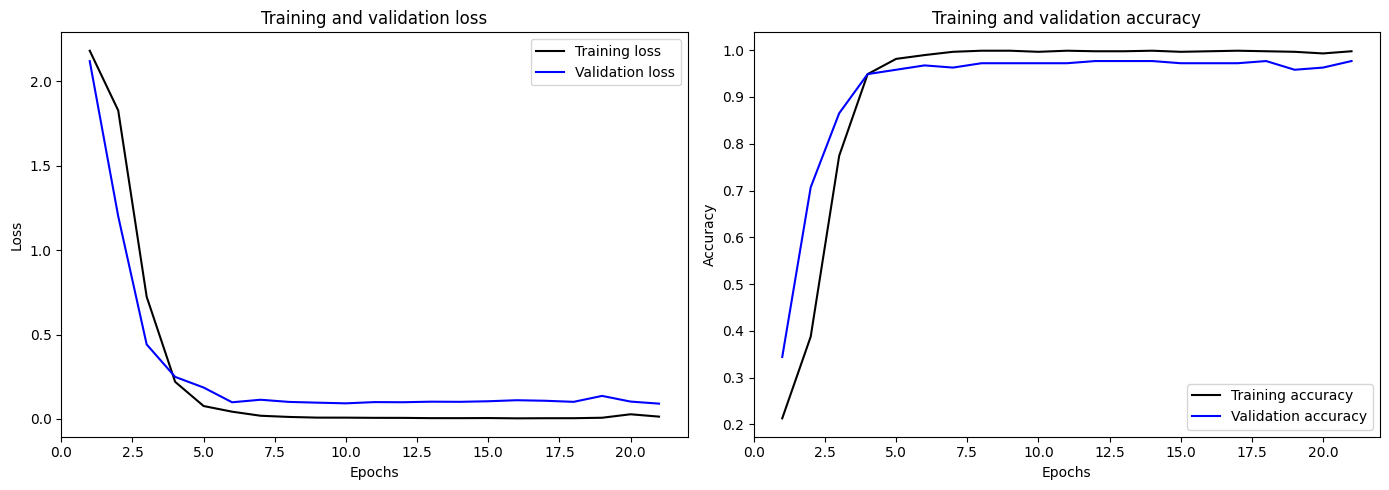

In [15]:
import matplotlib.pyplot as plt

# Function to plot the training history
def plot_training_history(history):
    # Extract the history data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)
    
    print(f'loss: {loss}')
    print(f'val_loss: {val_loss}')
    print(f'accuracy: {accuracy}')
    print(f'val_accuracy: {val_accuracy}')

    # Plot loss and validation loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'k', label='Training loss')  # black for loss
    plt.plot(epochs, val_loss, 'b', label='Validation loss')  # blue for val_loss
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'k', label='Training accuracy')  # black for accuracy
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')  # blue for val_accuracy
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


### Usage

In [17]:
# Function to predict top questions
def suggest_questions(user_input, total_questions=4):
    sequence = tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(sequence, maxlen=padded_sequences.shape[1], padding='post')
    predictions = model.predict(padded_sequence)
    labels = list(label_dict.keys())
    
    # Get top n categories with their probabilities
    top_categories_prediction = np.argsort(predictions[0])[-1:][::-1]
    top_categories = [(labels[idx], predictions[0][idx]) for idx in top_categories_prediction]
    
    # Print top categories with their probabilities
    print()
    print("Top category and with the probability:")
    for category, prob in top_categories:
        print(f'{category}: {prob:.4f}')
    
    # Filter questions from the dataset based on top categories
    suggested_questions = []
    for category, _ in top_categories:
        category_questions = df[df['Category'] == category]['Question'].tolist()
        suggested_questions.extend(category_questions)
    
    # return random n questions
    return np.random.choice(suggested_questions, total_questions)

# Example usage
# user_input = "Bagaimana cara berinvestasi yang aman?"
user_input = "Bagaimana cara memilih asuransi yang tepat?"
# user_input = "Bagaimana cara memilih saham yang baik?"
# user_input = "Bagaimana cara membuat anggaran bulanan yang efektif?"
# user_input = "Apa itu cryptocurrency?"
# user_input = "Apa yang harus saya lakukan jika suku bunga naik?"
# user_input = "Bagaimana cara saya memilih reksadana?"
# user_input = "Bagaimana cara saya memilih reksadana yang baik?"


suggested_questions = suggest_questions(user_input)
print("Suggested questions:")
for question in suggested_questions:
    print(question)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step

Top category and with the probability:
Asuransi: 0.9990
Suggested questions:
Apa itu asuransi unit link dan bagaimana cara kerjanya?
Bagaimana cara memahami polis asuransi kesehatan?
Bagaimana cara membandingkan berbagai produk asuransi?
Apa saja manfaat dari asuransi perjalanan?
